In [1]:
cd D:\\Datasets

D:\Datasets


In [2]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
#import visuals as vs # Supplementary code
from sklearn.cross_validation import ShuffleSplit

# Pretty display for notebooks
%matplotlib inline

# Load the Boston housing dataset
data1 = pd.read_csv('housing.csv')
X = data1.iloc[:,:-1].values
y = data1.iloc[:,3].values
    
# Success
#print ("Boston housing dataset has {} data points with {} variables each.".format(*data.shape))

C:\Users\Naveen\AppData\Local\Enthought\Canopy\edm\envs\User\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [3]:
data1

,RM,LSTAT,PTRATIO,MDEV
0,6.575,4.98,15.3,504000.0
1,6.421,9.14,17.8,453600.0
2,7.185,4.03,17.8,728700.0
3,6.998,2.94,18.7,701400.0
4,7.147,5.33,18.7,760200.0
5,6.430,5.21,18.7,602700.0
6,6.012,12.43,15.2,480900.0
7,6.172,19.15,15.2,569100.0
8,5.631,29.93,15.2,346500.0
9,6.004,17.10,15.2,396900.0


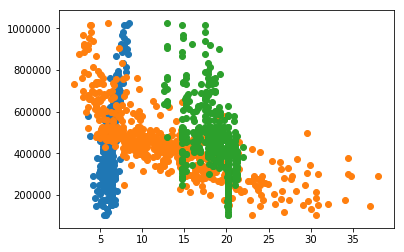

In [4]:
import matplotlib.pyplot as plt
plt.scatter(data1['RM'], data1['MDEV'])
plt.scatter(data1['LSTAT'], data1['MDEV'])
plt.scatter(data1['PTRATIO'], data1['MDEV'])

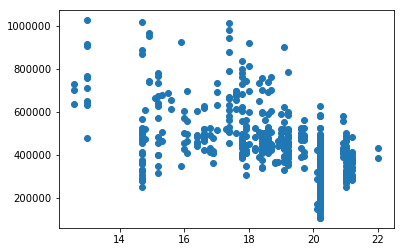

In [5]:
plt.scatter(data1['PTRATIO'], data1['MDEV'])

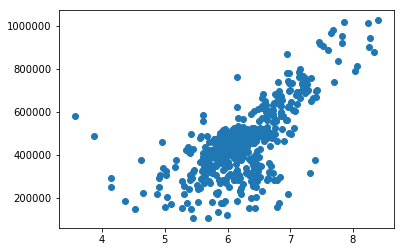

In [6]:
plt.scatter(data1['RM'], data1['MDEV'])

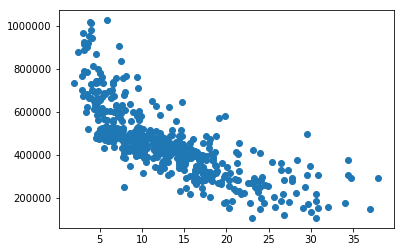

In [7]:
plt.scatter(data1['LSTAT'], data1['MDEV'])

In [8]:
# Splitting the dataset into the Training set and Test set
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [9]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape, X.shape, y.shape

((366L, 3L), (123L, 3L), (366L,), (123L,), (489L, 3L), (489L,))

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [10]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((366L, 3L), (366L,), (123L, 3L), (123L,))

In [11]:
# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LinearRegression
classifier = LinearRegression()
classifier.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [12]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred.shape

(123L,)

In [13]:
from sklearn.metrics import r2_score,mean_absolute_error, mean_squared_error, make_scorer
r2_score(y_test, y_pred)  

0.68702629634636425

In [14]:
# TODO: Import 'r2_score'

def performance_metric(y_test, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    
    # TODO: Calculate the performance score between 'y_true' and 'y_predict'
    score=r2_score(y_test, y_predict)
    
    # Return the score
    return score

In [15]:
# Calculate the performance of this model
score = performance_metric(y_test, y_pred)
#print( "Model has a coefficient of determination, R^2, of {:.3f}.".format(score))
print(score)

0.687026296346


In [16]:
y_test = pd.DataFrame(y_test)
y_pred = pd.DataFrame(y_pred)